In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Solving Differential Equations
See Sections 5.1-5.6 and Chapter 8 of your textbook. We'll circle back to the rest of Chapter 5 later. The equation numbers below refer to those used in the textbook, for your convenience. First, scroll down to see the problem with our simplistic method for solving differential equations (Euler method).

### Our path:
 - A more careful look at calculating derivatives
 - Consider three methods for solving ordinary differential equations:
   - Derive the Euler method (instructive, what we've actually been doing, and **not recommended** after today.
   - Derive the second-order Runge-Kutta method (but not write actual code here -- you'll do that in problem set 2!)
   - Show how to generalize to the fourth-order Runge-Kutta method, and have a look at extensions and further improvements.
 - We'll try out these methods with the classical simple harmonic oscillator and compare results. 

Recall, we have been naïvely using the definition of the derivative:

$$
\frac{dy(t)}{dt}  =  \lim_{h \rightarrow 0} \frac{y(t+h)-
y(t)}{h}.
$$

But there are some issues:
  - we saw what happens when $h$ isn't small enough. Even for reasonably small $h$, accumulated errors can become significant. We'll see a good example later in this notebook, for the simple harmonic oscillator.
  - there are also potential numerical precision problems calculating the derivative when $h$ is set to be very small: the numerator might not converge to 0 as $h\rightarrow 0$ (machine precision roundoff errors), so there can be an overflow error.
  - we were taking simplistic "forward differences", which we will now investigate.

Let's understand more formally what we were actually doing (called Euler's method), then see how to improve. First, let's look at calculating derivatives.

### Forward Difference (a "two-point" algorithm)

Start by expanding a function in a Taylor series about a point $t$ to obtain its value at a small step $h$ away:

$$\begin{align} y(t+h) &= y(t) + h \frac{dy(t)}{dt}+ \frac{h^{2}}{2!}
\frac{d^2y(t)}{dt^2}+ \frac{h^{3}}{3!} \frac{dy^3(t)}{dt^3} +
\cdots,   \tag*{5.2}\\ \\
\Rightarrow \qquad \frac{y(t+h) - y(t)}{h}  &=    \frac{dy(t)}{dt}+ \frac{h}{2!}
\frac{d^2y(t)}{dt^2}+ \frac{h^{2}}{3!} \frac{dy^3(t)}{dt^3} +
\cdots, \tag*{5.3}
   \end{align}$$
   

If we neglect the $h^2$ and higher terms, we see the *forward-difference* algorithm for the derivative:

$$
\left.\frac{dy(t)}{dt}\right|_{\text{fd}} \equiv\frac{y(t+h) - y(t)}{h}$$

which is pretty much what we had in our naïve (day-one) implementation. You might at first think this is really the derivative, but it isn't: $h$ does not usually go to 0. A knob we have to control the size of the error on the derivative calculation is the size of $h$, and now we can make a quantitative estimate of that error.

The estimate of the error follows from inspecting equation 5.3 (look at what was removed in the truncation):

$$\left.\frac{dy(t)}{dt}\right|_{\text{fd}} \simeq \frac{dy(t)}{dt} -
\frac{h}{2}\frac{d^2y(t)}{dt^2} - \cdots .$$

So the error is proportional to $h$ (the leading term in the error).

You can think of this approximation as using two points to represent the function by a straight line in the interval from $t$ to $t + h$. See the figure below. The approximation has an error proportional to $h$ (unless the function is linear or has zero 2nd derivative). Again, we can make the error smaller by making $h$ smaller, but if $h$ is too small round-off error can take over.

An example: let $y(t) = a + b t^2$. The exact derivative is $\dot{y} = 2 b t$, while the computed derivative is

$$
\left.\frac{dy(t)}{dt}\right|_{\text{fd}}\simeq \frac{y(t+h)-y(t)}{h}
= 2bt +bh.
$$

Thus, we see this becomes a good approximation only for very small
$h$, specfically $h\ll 1/b$.

We'd like a technique that has an error that is higher-order in $h$.



### Central Difference (a "three-point" algorithm")

Instead of making a single step of $h$ forward, we form a *central difference*
by stepping forward half a step and backward half a step:

$$\begin{align}
 \left. \frac{dy(t)}{dt}\right|_{\text{cd}}  \equiv D_{\text{cd}} y(t)   &=
\frac{y(t+h/2)-y(t-h/2)}{h}.
\end{align}$$

so this is a "three-point algorithm" name. The figure below compares the two-point and three-point approaches:

<img src="Figures/Figure_5.1.png" width="70%">

We can again use the Taylor series to estimate the error:

$$\begin{align}
y\left(t+\frac{h}{2}\right)-y\left(t-\frac{h}{2}\right) &
\simeq \left[y(t) + \frac{h}{2}y'(t) + \frac{h^2}{8}y''(t) +
\frac{h^3}{48}y'''(t)+ {\cal O}(h^4) \right]
  \\
&\quad - \left[y(t) - \frac{h}{2}y'(t) + \frac{h^2}{8}y"(t) -
\frac{h^3}{48}y'''(t)+ {\cal O}(h^4)\right]   \\
& = h y'(t) + \frac{h^3}{24}y'''(t) + {\cal O}(h^5), \\
\Rightarrow \quad \frac{dy(t)}{dt}\bigg|_{\text{cd}} & \simeq   y'(t)
+\frac{1}{24}h^{2}y'''(t) + {\cal O}(h^4) .\tag*{5.8}
   \end{align}$$

In words, all terms containing an even power of $h$ in the two Taylor
series cancel. This make the central-difference algorithm accurate to order
$h^2$ ($h^3$ before division by $h$), while the forward
difference is accurate only to order $h$. If the $y(t)$ is smooth, that is, if
$y'''h^{2}/24 \ll y''h/2$, then you can expect the central-difference error to be
smaller than with the central difference algorithm.  As usual, if $y'''$ vanishes, then the numerical derivative is exact.

Using the same example of a parabola, $y(t)=bt^2$:

$$
\left. \frac{dy(t)}{dt}\right|_{\text{cd}} \simeq
\frac{y(t+{h/2})-y(t-{h/2})}{h} = 2bt.$$

which is exact! This is a special case, of course, because the higher derivatives equal zero for a second order polynomial. Still, the advantage over the forward-difference method is clear, where precision matters.

----------
----------
----------

*Have a look at section (5.5) of your textbook, which shows how to compare algorithm error with round-off error for the above techniques.*

---------
---------
---------


Now we are ready to start looking in more detail at the methods for solving ordinary differential equations.


## Euler Methods

We now see that our day-one algorithm for solving a differential equation was just the repeated application of the forward-differencing algorithm. This is Euler's method or Euler's rule. As your book puts it,

<img src="Figures/Figure_8.3.png" width="70%">

Your book posits that Euler's method has an error for each step of $\mathcal{O}(h^2)$. If there are $N \sim 1/h$ steps, then the total error for the method scales as $N\mathcal{O}(h^2) =  \mathcal{O}(h)$.

See the figure below.  Note that it is not only $h$, but also $y''=f'$, that determine the total error (yes, if $y$ is a linear function, then $y''=0$, and Euler's method at first order is exact, but how often does that happen?).

<img src="Figures/Figure_8.4.png" width="50%">

**So, we want to do better**. Most textbooks and course lecturers warn that Euler's method is certanily instructive, but **not recommended** for solving problems.


BTW, [did you see this movie?](https://www.youtube.com/watch?v=v-pbGAts_Fg). Notice what happens around 0:45 and 1:10 :-)



Note: a different way of increasing the accuracy is to sample the function at more points, rather than just at $t_n$. Such methods are called **multistep** methods, which you are welcome to explore. See your textbook. 

We'll move on now to the generally recommended method. 


## Runge-Kutta

The most commonly used approach that is broadly applicable (though no one algorithm is good for solving all ODEs), is the *fourth-order Runge-Kutta algorithm*, `rk4`, or its extension with adaptive step size, `rk45`. Your textbook, and other references, characterize it as "robust" and "capable of industrial-strength work". Okay...

To develop all the relevant ideas, we'll derive the second-order version `rk2` and then generalize to fourth-order. 

The Runge-Kutta algorithm employs the exact integral expression for the step:

$$\begin{align}
\frac{dy}{dt} = f(t,y) \quad &\Rightarrow  \quad y(t) = \int f(t,y)\; dt \\ \\
     \Rightarrow \quad  &y_{n+1} = y_{n} + \int_{t_{n}}^{t_{n+1}} f(t,y)\; dt.
 \end{align}$$

and expands $f(t,y)$ in a Taylor series about the *midpoint* of the integration interval. The second-order version (`rk2`) keeps the first two terms:

$$f(t,y) \simeq f(t_{n+1/2}, y_{n+1/2}) + (t-t_{n+1/2})
        \frac{df}{dt}(t_{n+1/2})        +  {\mbox{$\cal O$}}(h^2)$$

This is still a linear approximation, but anchored at the midpoint value instead of the endpoint values, learning the lesson from our earlier discussion.

**Now, here's the first trick**: $(t − t_{n + 1/2})$ raised to any odd power is
equally positive and negative over the interval $t \leq t \leq t_{n + 1}$ (it's odd about the midpoint), so the integral of the $(t − t_{n + 1/2})$ term vanishes (remember: $\frac{df}{dt}(t_{n+1/2})$ is a constant in that integral, as it's the derivative evaluated at the midpoint).

So:

$$\begin{align}
 \int_{t_{n}}^{t_{n+1}}  f(t,y)  dt &\simeq    f (t_{n+1/2},\
y_{n+1/2}) h + {\mbox{$\cal O$}}(h^3),\\
\Rightarrow\quad    y_{n+1} &\simeq y_{n} + h f(t_{n+1/2},\
y_{n+1/2}) + \mbox{$\cal O$}(h^3)
\quad\mbox{(rk2)}.
\end{align}$$

<img src="Figures/Figure_8.5.png" width="50%">


That's promising, but how do we evaluate the derivative function and the solution $y$ <u>at the middle of the time
interval</u>, $t_{n+1/2} = t_{n}+h/2$???? 

After all, we don't know the value of $y_{n + 1/2}$, and we cannot use this algorithm to get it. Remember, we need a "self-starting" algorithm that takes given initial values then iterates on its own.

The problem is solved with a **second trick**: use Euler’s method (first order) to approximate $y_{n + 1/2}$:

$$y_{n+1/2} \approx y_{n} + \frac{1}{2} h \frac{dy}{dt}
    =    y_{n}  + \frac{1}{2} h f(t_{n},\ y_{n}).$$

Then, we evaluate the derivative function $f$ at this calculated $y_{n+1/2}$.

Putting this all together gives the complete `rk2` algorithm: 

$$\begin{align}
 \mbox{} &   y_{n+1} \ \simeq\
y_{n} + k_{2} \\
 &  k_{2} = h\; f\left(t_{n} +    \frac{h} {2},\
y_{n} + \frac{k_{1}} {2}\right), \quad
        k_{1} = h\; f(t_{n},\
        y_{n}),\end{align}$$

Notice that the known derivative function $f$ is evaluated at the ends and the midpoint of the interval (in other words, you can code the $k_1$ and $k_2$), and only the (known) initial value of the dependent variable $y$ is required. This makes the algorithm self-starting. Put another way, instead of just using the slope at the starting point of the interval, RK2 also uses the slope at the midpoint. 

We'll see below that this works well.

There are variations on this approach. Your textbook describes some, and there is a [surprisingly useful summary here](https://en.wikipedia.org/wiki/Runge–Kutta_methods).

### Fouth-order R-K
As you have probably already guessed, the next obvious step for improvement is to keep more terms in the Taylor series. Indeed, as your book says,

*the fourth-order Runge-Kutta method `rk4` obtains $\mathcal{O}(h^4)$ precision by approximating $y$ as a Taylor series up to $h^2$ (a parabola) at the midpoint of the interval, which again leads to cancellation of lower-order error. `rk4` provides an excellent balance of
power, precision, and programming simplicity. There are now four gradient
($k$) terms to evaluate, with four subroutine calls. This provides an improved
approximation to $f(t, y)$ near the midpoint. Although `rk4` is
computationally more expensive than the Euler method, its precision is much
better, and some time is saved by using larger values for the step size $h$.
Explicitly, `rk4` requires the evaluation of four intermediate slopes, and these
are approximated with the Euler algorithm (Press et al, 1994):*

$$\begin{align}
y_{n+1} &= y_{n} + \frac{1}{6}(k_{1} +
2k_{2} + 2 k_{3} + k_{4}),&&\\
k_{1} &= h\; f(t_{n}, y_{n}), \quad
&k_{2} &= h\; f\!\left(t_{n}+\frac{h}{2},
y_{n}+\frac{k_1}{2}\right),  \\
k_{3} &= h\; f\!\left(t_{n}+\frac{h}{2},
y_{n}+\frac{k_2}{2}\right),\quad &
k_{4} &= h\; f(t_{n}+h,
y_{n}+k_{3}).
 \end{align}$$

An example will help clarify.


### Let's start trying out all these things.
We'll use the simple harmonic oscillator as our test system, as we know what the answers should be. In Problem Set 2, you'll write your own `rk2`. The book shows an `rk4` listing, in case you want to play with it. Today, we'll use our own Euler method, but we'll use a canned version of `rk2` and `rk4`, to avoid tempting you to copy/paste an `rk2` implementation. After this problem set, you may also use these canned versions.

##### Classical Simple Harmonic Oscillator test bench
The total energy is 

$$E=\frac{p^2}{2m}+\frac{1}{2}kx^2 $$

where $m$ is the mass, $p$ is the momentum $p=m\dot{x}$, and $k$ is the linear spring constant. For coding convenience, we set $m=k=1$, so the angular frequency and period are

$$\omega=\sqrt{\frac{k}{m}}=1 \:\:\:\:\: T=\frac{2\pi}{\omega}=2\pi$$

Without any damping or external forces, $E$ is constant:

$$2E=p^2+x^2$$

and the phase space plot (trajectory in the $xp$ plane) should simply be a circle of radius $\sqrt{2E}$. These characteristics provide good tests for our methods.

The equation of motion is $\ddot{x}=-x$ ( *i.e.,* $F=-kx$ for a linear spring), so we have

$$ \dot{p}=-x \\ \dot{x}=p $$.

Let's solve this numerically and compare the results. We'll start at $x=1$ from rest, with a step size of 1/50th of a period, and watch for 10 periods.

#### Euler

$$x_{n+1}=x_n+hp_n \\ \\
  p_{n+1}=p_n-hx_n $$


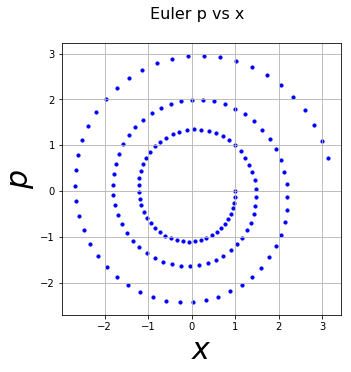

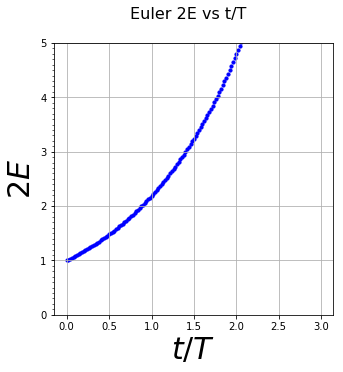

In [2]:
# Euler, rk2, and rk4
%matplotlib inline
%matplotlib inline
T=2.*np.pi
h=T/50.     # change this and explore!!!!!!!!!!!!!!!!!!!!!!
ttot=3.*T
#
figwidth=5
figheight=5
#
t=np.arange(0.,ttot,h)
xe = np.zeros(len(t)).astype('float')
pe = np.zeros(len(t)).astype('float')
xrk2 = np.zeros(len(t)).astype('float')
prk2 = np.zeros(len(t)).astype('float')
xrk4 = np.zeros(len(t)).astype('float')
prk4 = np.zeros(len(t)).astype('float')
xe[0]=xrk2[0]=xrk4[0]=1.
pe[0]=prk2[0]=prk4[0]=0.
for i in range(1,len(t)): # recall, indexing counts starting from 0    
    # Euler:
    xe[i]=xe[i-1]+pe[i-1]*h
    pe[i]=pe[i-1]-xe[i-1]*h
    # RK2
    xrk2[i]=xrk2[i-1]*(1-h*h/2.)+prk2[i-1]*h
    prk2[i]=prk2[i-1]*(1-h*h/2.)-xrk2[i-1]*h
    # RK4
    k1x=prk4[i-1]
    k1p=-xrk4[i-1]
    k2x=prk4[i-1]+h*k1p/2.
    k2p=-(xrk4[i-1]+h*k1x/2.)
    k3x=prk4[i-1]+h*k2p/2.
    k3p=-(xrk4[i-1]+h*k2x/2.)
    k4x=prk4[i-1]+h*k3p
    k4p=-(xrk4[i-1]+h*k3x)
    xrk4[i]=xrk4[i-1]+h*(k1x+2.*k2x+2.*k3x+k4x)/6.
    prk4[i]=prk4[i-1]+h*(k1p+2.*k2p+2.*k3p+k4p)/6.
fig1=plt.figure(1,[figwidth,figheight])
ax=fig1.gca()
ax.grid(True)
fig1.suptitle('Euler p vs x', fontsize=16)
plt.scatter(xe, pe, 10, 'b')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2e=(pe*pe+xe*xe)
fig2=plt.figure(2,[figwidth,figheight])
ax=fig2.gca()
ax.grid(True)
# Major and minor ticks
major_ticks = np.arange(0., 20., 1.)
minor_ticks = np.arange(0., 20., .1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(True, which='major')
ax.set_ylim([0., 5.])
fig2.suptitle('Euler 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2e, 10, 'b')
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()

### NOT. GOOD.
Recall, the phase space plot should be a closed circle of radius 1, and the energy should be a constant $2E=1$. The plots can be made more accurate by making $h$ smaller, but after all the above work we know we can do better. 

<div class="alert alert-block alert-info">
A brief pause to check your understanding: why are the phase space trajectories of oscillators like this clockwise??
</div>


#### RK2


Now, we solve using `rk2`. You'll construct your own general solver(s) on problem set 2, but let's look at this specific case. It is still true that 

$$ \dot{p}=-x \\ \dot{x}=p $$.

but now we'll be evaluating these at an intermediate point as well as at the end of each interval.

Sometimes RK2 is written in the more transparent, but equivalent, form (beware: some textbooks put the $h$ in the $k$ definition, as yours does, others pull it out front, leaving the $k$s as the bare slopes, not slopes x intervals):

$$x_{n+1}=x_n+(k_1^x+k_2^x)/2. \:\:\:\:\:\: p_{n+1}=p_n+(k_1^p+k_2^p)/2. \\
k_1^x=hp_n \:\:\:\:\:\:\:\:\:\:\:\: k_1^p=\; -hx_n \\
k_2^x=h(p_n+hk_1^p) \:\:\:\:\:\:\:\:\:\: k_2^p=\;-h(x_n+hk_1^x)
$$

where the $k$s tell us about the slope in the interval. In other words, we're effectively averaging the slopes at the two end points to get the slope in the middle of the interval. At this order in the expansion, it says equivaltently that the slope is changing linearly. RK4 will take into account terms of higher order in the expansion.


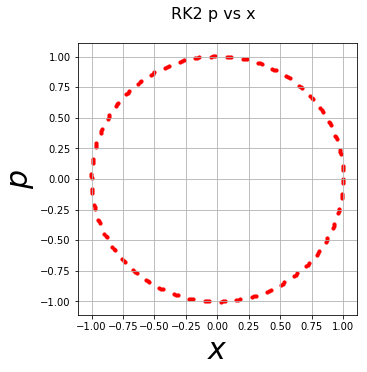

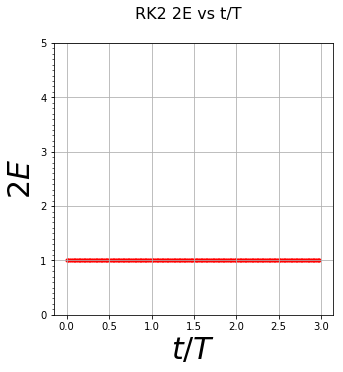

In [3]:
fig3=plt.figure(3,[figwidth,figheight])
ax=fig3.gca()
ax.grid(True)
fig3.suptitle('RK2 p vs x', fontsize=16)
plt.scatter(xrk2, prk2, 10, 'r')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2rk2=(prk2*prk2+xrk2*xrk2)
fig4=plt.figure(4,[figwidth,figheight])
ax=fig4.gca()
ax.grid(True)
# Major and minor ticks
major_ticks = np.arange(0., 20., 1.)
minor_ticks = np.arange(0., 20., .1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(True, which='major')
ax.set_ylim([0., 5.])
fig4.suptitle('RK2 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2rk2, 10, 'r')
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()

### MUCH BETTER!
It's the same step size, so we obtain much better accuracy at little expense compuationally. 

But...why are the points on the phase space plot shifting from period to period? After all, we set the step size to be T/50, so shouldn't subsequent periods overlap (certainly to the precision visible on this plot)? What do you think?

Also, let's zoom in on that energy plot:

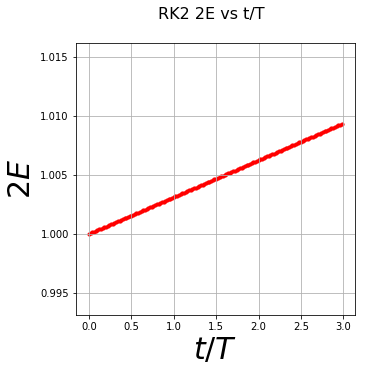

In [4]:
fig4=plt.figure(4,[figwidth,figheight])
ax=fig4.gca()
ax.grid(True)
# Major and minor ticks
#ax.set_ylim([0., 5.])
fig4.suptitle('RK2 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2rk2, 10, 'r')
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()

Notice the scale. It's good, but the wandering off could be significant, depending on the precision we want and the number of periods we want to model. 

#### RK4

Now look at RK4. Following what we did above, we have:


$$x_{n+1}=x_n+(k_1^x+2k_2^x+2k_3^x+k_4^x)/6. \:\:\:\:\:\: p_{n+1}=p_n+(k_1^p+2k_2^p+2k_3^p+k_4^p)/6. \\
k_1^x=hp_n \:\:\:\:\:\:\:\:\:\:\:\: k_1^p=\; -hx_n \\
k_2^x=h(p_n+\frac{1}{2}hk_1^p) \:\:\:\:\:\:\:\:\:\: k_2^p=\;-h(x_n+\frac{1}{2}hk_1^x) \\
k_3^x=h(p_n+\frac{1}{2}hk_2^p) \:\:\:\:\:\:\:\:\:\: k_3^p=\;-h(x_n+\frac{1}{2}hk_2^x) \\
k_4^x=h(p_n+hk_3^p) \:\:\:\:\:\:\:\:\:\: k_4^p=\;-h(x_n+hk_3^x) \\
$$

Again, effectively an average of the slopes in the subdivisions over the interval, accurate to the next-higher order in $h$. You can see, below, that the results are excellent. 

There are further refinements, such as optimizing the interval sizes to get better accuracy where it is needed. You book cautions against rolling your own RK4 (there are code listings in your textbook for two RK4 versions, on pp181-183, if you'd like start with those and then explore), as the chance of programming errors rises with complexity. So, next, we'll look at canned algorithms.

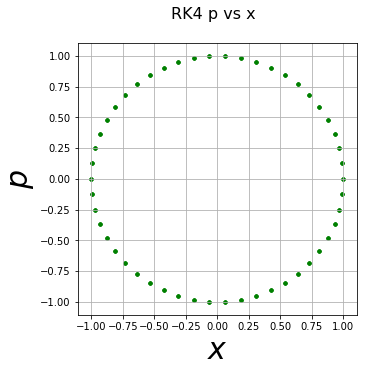

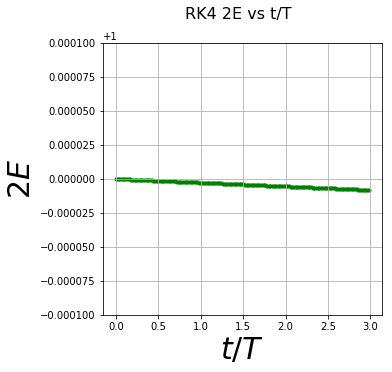

In [5]:
fig3=plt.figure(3,[figwidth,figheight])
ax=fig3.gca()
ax.grid(True)
fig3.suptitle('RK4 p vs x', fontsize=16)
plt.scatter(xrk4, prk4, 10, 'g')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2rk4=(prk4*prk4+xrk4*xrk4)
fig4=plt.figure(4,[figwidth,figheight])
ax=fig4.gca()
ax.grid(True)
fig4.suptitle('RK4 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2rk4, 10, 'g')
ax.set_ylim([.9999, 1.0001])
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()

There are further refinements, such as optimizing the interval sizes to get better accuracy where it is needed. You book cautions against rolling your own RK4, as the chances of programming errors rises with complexity. So, next, we'll look at canned algorithms.

#### Canned ODE solving algorithms

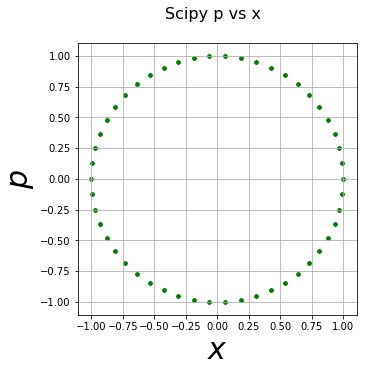

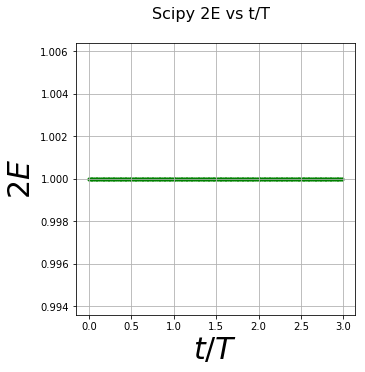

In [6]:
import scipy.integrate as integrate

def SHO(Y, t):
    # let Y[0] be x, Y[1] by p
    return [Y[1], -Y[0]]
Y = integrate.odeint(SHO, [1, 0], t)
fig5=plt.figure(5,[figwidth,figheight])
ax=fig5.gca()
ax.grid(True)
fig5.suptitle('Scipy p vs x', fontsize=16)
plt.scatter(Y[:,0], Y[:,1], 10, 'g')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2scipy=(pow(Y[:,1],2)+pow(Y[:,0],2))
fig6=plt.figure(6,[figwidth,figheight])
ax=fig6.gca()
ax.grid(True)
fig6.suptitle('Scipy 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2scipy, 10, 'g')
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()





Nice. Let's do it again, this time for 500 periods, and blow up the y axis scale for 2E

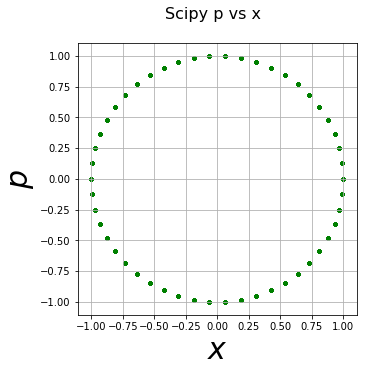

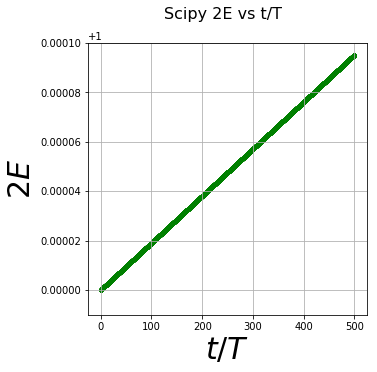

In [7]:
ttot=500.*T
t=np.arange(0.,ttot,h)
Y = integrate.odeint(SHO, [1, 0], t)
#print(Y[:,1])
fig5=plt.figure(5,[figwidth,figheight])
ax=fig5.gca()
ax.grid(True)
fig5.suptitle('Scipy p vs x', fontsize=16)
plt.scatter(Y[:,0], Y[:,1], 10, 'g')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2scipy=(pow(Y[:,1],2)+pow(Y[:,0],2))
fig6=plt.figure(6,[figwidth,figheight])
ax=fig6.gca()
ax.grid(True)
fig6.suptitle('Scipy 2E vs t/T', fontsize=16)
plt.scatter(t/T, E2scipy, 10, 'g')
ax.set_ylim([.99999, 1.0001])
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()

Excellent! After you get some practice in problem set 2 writing your own ODE solver, we'll then use Scipy or other solvers. These have important refinements, several of which are described in your textbook:

  - adaptive steps, to put the time into regions that need finer sampling. Remember, there are two reasons not to make steps too small: more steps, hence more time, would be required, and roundoff errors could become significant. An adaptive-step algorithm helps with the first concern, at least.
  - multi-step methods that use the information from more than just the most recent value of $y_n$ to calculate the next step.
  
      - BTW, in the textbook there is a serious typo in the section on the Adams-Bashforth-Moulton equations -- an inadvertent copy/past of the equations for the 4th-order Runge-Kutta method! 
      
When using canned packages, it's always good to give test problems of types similar to verify you are getting what you need from those algorithms. In addition, it is usually wise to look at the source code, whenever possible. For Scipy, you can [start here](https://github.com/scipy/scipy). From looking at the *integrate* package, you can see that the method used above (odeint) is actually based on old fortran code, and they point the user to a newer package, [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which has switches for various algorithms appropriate for different types of problems. Try it!

If you are interested, you are encouraged to explore the methods and their limitatations. You might want to look at, *e.g.*, [this link](https://en.wikipedia.org/wiki/Stiff_equation) to see some of the potential issues.


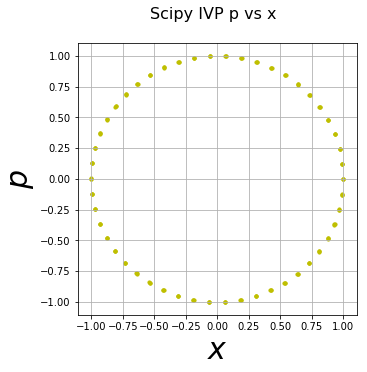

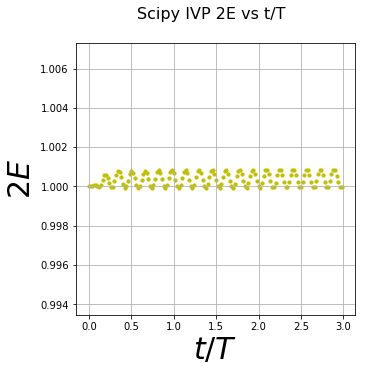

In [8]:
# let's try the newer code here
def SHOivp(t, Y):
    # let Y[0] be x, Y[1] by p
    return [Y[1], -Y[0]]
ttot=3.*T
t=np.arange(0.,ttot,h)
Y = integrate.solve_ivp(SHOivp, [0.,ttot], [1., 0.], vectorized=True, t_eval=t, method='RK45')
#print(Y.y[0])
fig5=plt.figure(5,[figwidth,figheight])
ax=fig5.gca()
ax.grid(True)
fig5.suptitle('Scipy IVP p vs x', fontsize=16)
plt.scatter(Y.y[0], Y.y[1], 10, 'y')
ax.set_xlabel('$x$', size=30)                 #labels
ax.set_ylabel('$p$',size=30)
E2scipyIVP=(pow(Y.y[0],2)+pow(Y.y[1],2))
fig6=plt.figure(6,[figwidth,figheight])
ax=fig6.gca()
ax.grid(True)
fig6.suptitle('Scipy IVP 2E vs t/T', fontsize=16)
plt.scatter(Y.t/T, E2scipyIVP, 10, 'y')
ax.set_xlabel('$t/T$', size=30)                 #labels
ax.set_ylabel('$2E$',size=30)
plt.show()





Disappointing. Did I use this incorrectly? When I have time, I'll look at the Scipy codebase, but I will stick with the well-used odeint for now.